<a href="https://colab.research.google.com/github/williambrunos/Introduction-To-ML/blob/main/Class_3/K_means_oficina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Leitura dos dados

In [2]:
df = pd.read_csv('https://leadfortaleza.com.br/ead2pcd/conteudo/tmp/myopenolat_1_102577677377129//Oficina/download/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

### Verificar dados nulos

In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
print(df.info()) # 200 observações ao todo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


### Informações estatísticas

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Gerando gráfico da idade versus score do cliente

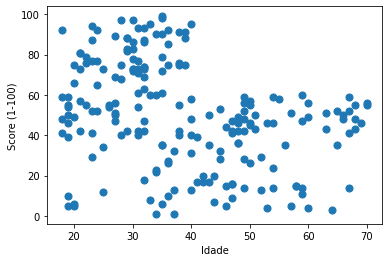

In [7]:
plt.scatter(df['Age'], df['Spending Score (1-100)'], s=50)
plt.xlabel('Idade')
plt.ylabel('Score (1-100)')
plt.show()

### Agora é sua vez de praticar

selecione os dados de 'Age' e 'Spending Score (1-100)' no dataframe para realizar o agrupamento com kmeans

In [8]:
# selecione no dataframe df as colunas Age e Spending Score (1-100)
X = df[['Age', 'Spending Score (1-100)']]
print(X)

     Age  Spending Score (1-100)
0     19                      39
1     21                      81
2     20                       6
3     23                      77
4     31                      40
..   ...                     ...
195   35                      79
196   45                      28
197   32                      74
198   32                      18
199   30                      83

[200 rows x 2 columns]


### Clusterizando com k = 5

In [9]:
# escreva aqui em baixo o código para fazer a clusterização
from sklearn.cluster import KMeans

In [10]:
model = KMeans(n_clusters=5, init='k-means++') # k-means++ para inicializar os centróides iniciais de forma otimizada
y_classes = model.fit_predict(X)
print(y_classes)

[2 0 1 0 2 0 1 0 1 0 1 0 1 0 1 0 3 2 3 0 3 0 1 0 1 0 3 2 3 0 1 0 1 0 1 0 1
 0 1 0 4 0 3 2 3 2 4 2 2 2 4 2 2 4 3 3 4 4 2 4 4 2 4 4 4 2 3 4 2 2 4 3 4 4
 4 2 3 3 2 3 4 2 4 3 2 3 4 2 2 3 4 2 3 3 2 2 3 2 3 2 2 3 4 2 4 2 4 4 4 4 4
 2 3 2 2 2 4 4 3 4 2 3 2 0 2 0 3 0 1 0 1 0 2 0 1 0 1 0 1 0 1 0 2 0 1 0 3 0
 1 0 1 0 1 0 1 0 1 0 1 0 3 0 1 0 3 0 1 0 3 2 1 0 1 0 1 0 1 0 1 0 3 0 1 0 3
 0 1 0 1 0 1 0 1 0 1 0 3 0 1 0]


### Plot um gráfico com todos os grupos

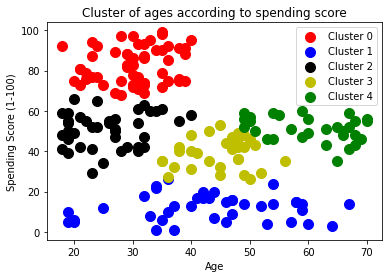

In [11]:
# escreva aqui o código para plotar o gráfico
k_groups = 5
colors = ['r', 'b', 'k', 'y', 'g']
for k in range(k_groups):
  # cluster points = Células de X onde y_classes == k
  cluster_points = X[y_classes == k]
  plt.scatter(cluster_points['Age'], cluster_points['Spending Score (1-100)'], s=100, c=colors[k], label=f'Cluster {k}')

plt.title('Cluster of ages according to spending score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Elbow Criterion Method

The elbow criterion method is a way to find the best value of **k: num_of_clusters** for best clustering our data. We can do this by calculating the sum of squared errors for each choice of k in a certain range and see at a plot the best value of k.

But...what is the best value of k and how can we see it on a plot? It's simple, trying to train the best clustering model, we have to avoid both of underfitting and overfitting, because of this the value of k is so important. But the real best value of k is that one that is equal to all the data points of our dataset, but there we will have a overfitting. So, the "real best k value" is that one that, as far as we increase the value of k, the value of SSE does not decreases so much. We call this 'k' point of "elbow" on a graph of SSE X k, and its the value that does not produces either a model with over or underfitting.

[]

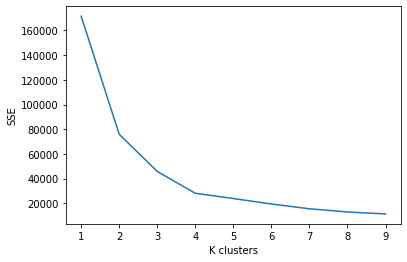

In [14]:
# sse will be a dict with the value of k and its sse produced
sse = {}
for k in range(1, 10):
  kmeans = KMeans(init='k-means++', n_clusters=k).fit(X)
  sse[k] = kmeans.inertia_

plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('K clusters')
plt.ylabel('SSE')
plt.plot()

In [15]:
model = KMeans(init='k-means++', n_clusters=4)
y_classes = model.fit_predict(X)

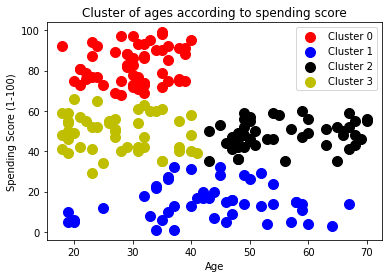

In [16]:
# escreva aqui o código para plotar o gráfico
k_groups = 4
colors = ['r', 'b', 'k', 'y', 'g']
for k in range(k_groups):
  # cluster points = Células de X onde y_classes == k
  cluster_points = X[y_classes == k]
  plt.scatter(cluster_points['Age'], cluster_points['Spending Score (1-100)'], s=100, c=colors[k], label=f'Cluster {k}')

plt.title('Cluster of ages according to spending score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Silhouette

In [22]:
kmeans_kwargs = {
     "init": "random",
     "n_init": 10,
     "max_iter": 300,
     "random_state": 42,
}

In [24]:
from sklearn.metrics import silhouette_score
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)

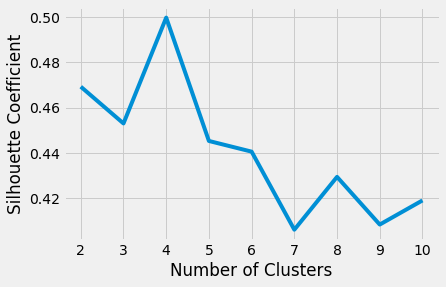

In [25]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

### Seeing other parameters of the model

In [21]:
model.inertia_ # For a given k, what was the lowest SSE value?

28165.583566629342

In [20]:
model.labels_ # In which label each data fits

array([3, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 3, 3, 1, 0, 3, 0,
       1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 3,
       1, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3,
       3, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 0, 3, 0, 2, 0, 1, 0, 1, 0,
       3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)

In [17]:
model.cluster_centers_ # Points of clusters

array([[30.1754386 , 82.35087719],
       [43.29166667, 15.02083333],
       [55.70833333, 48.22916667],
       [27.61702128, 49.14893617]])

In [19]:
model.n_iter_ # The number of iterations needed to converge the model

7